MLP Básica (Core)
 Descripción:
En esta actividad, implementarás una red neuronal de perceptrón multicapa (MLP) básica utilizando el dataset «Breast Cancer Wisconsin (Diagnostic)» disponible en Kaggle. Este dataset es adecuado para la clasificación binaria, donde la red MLP predecirá si un tumor es benigno o maligno basado en una serie de características.

Enlace al dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data



Objetivo:

El objetivo de la actividad es implementar una red MLP básica con una capa oculta, entrenarla en el dataset de cáncer de mama y evaluar su rendimiento en términos de precisión y otras métricas de clasificación.



Instrucciones:

1. Carga de datos:
  - Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.
  - Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


ValueError: List of boxplot statistics and `positions` values must have same the length

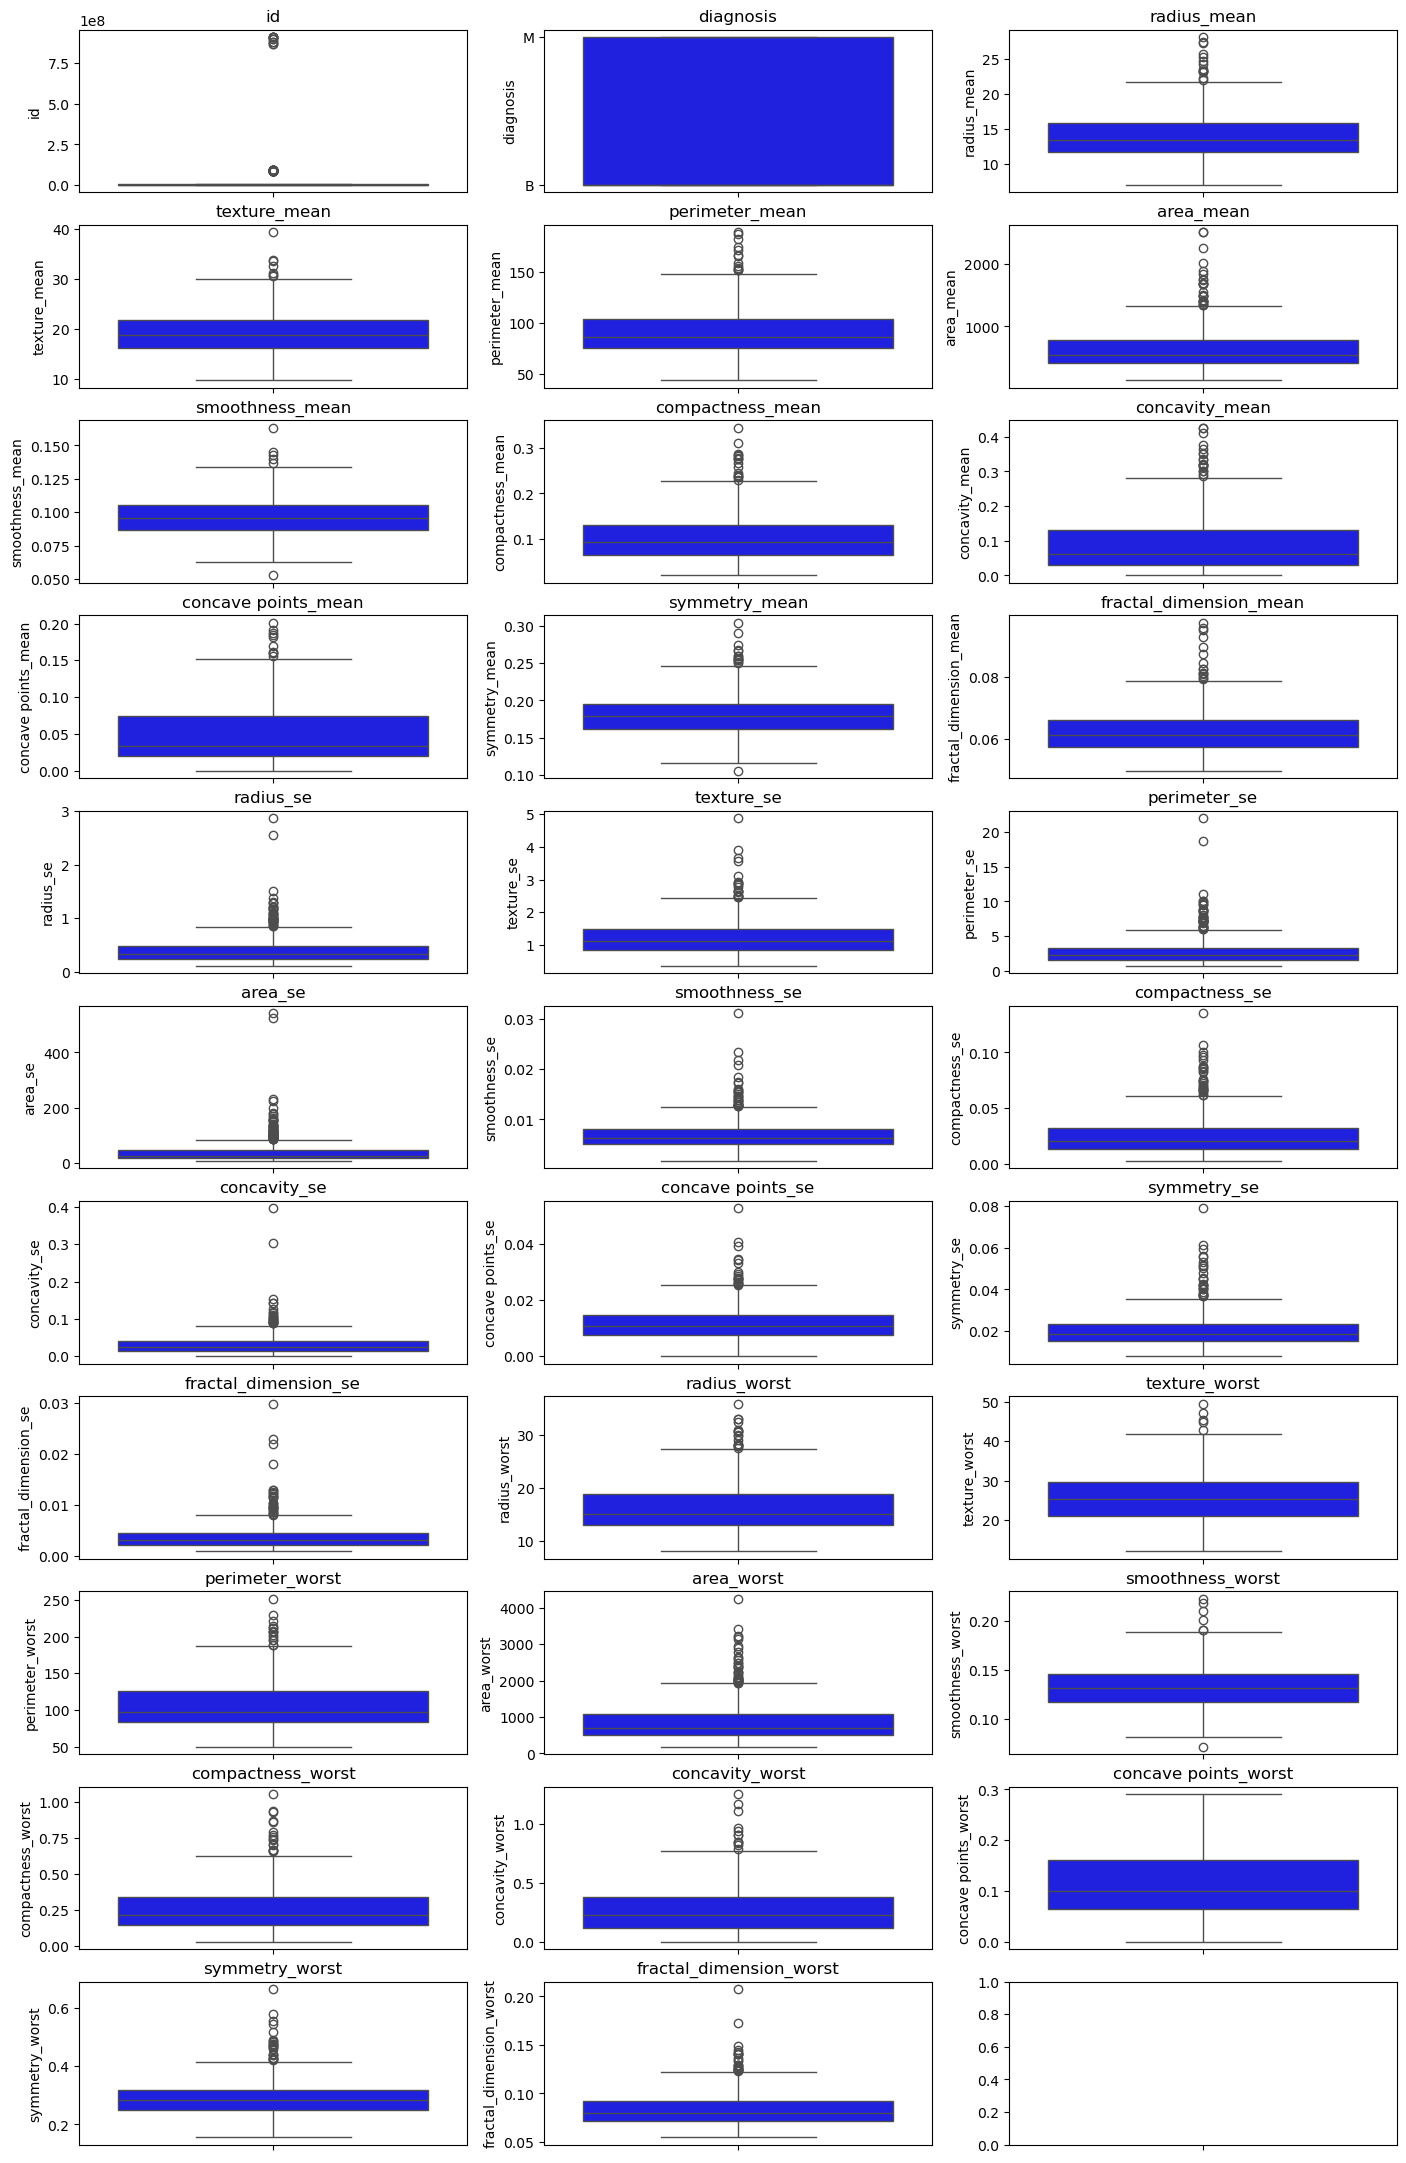

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura 
plt.figure(figsize=(17, 30)) 
# Crear un boxplot para cada variable en el DataFrame 
for i, column in enumerate(df.columns, 1): 
    plt.subplot(len(df.columns)//3 + 1, 3, i) 
    sns.boxplot(data=df[column], orient="v", color="blue") 
    plt.title(column) 
# Ajustar el layout para que los plots no se sobrepongan 
plt.tight_layout() 
# Mostrar los plots 
plt.show()


2. Exploración y preprocesamiento de datos:
  - Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
  - Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score

# Prepare features and target
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y =df['diagnosis']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo (diagnosis)
encoder = OneHotEncoder()
y_enc = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()

print("\
Scaled data shape:", X_scaled.shape)
print("Number of features:", X_scaled.shape[1])


Scaled data shape: (569, 30)
Number of features: 30


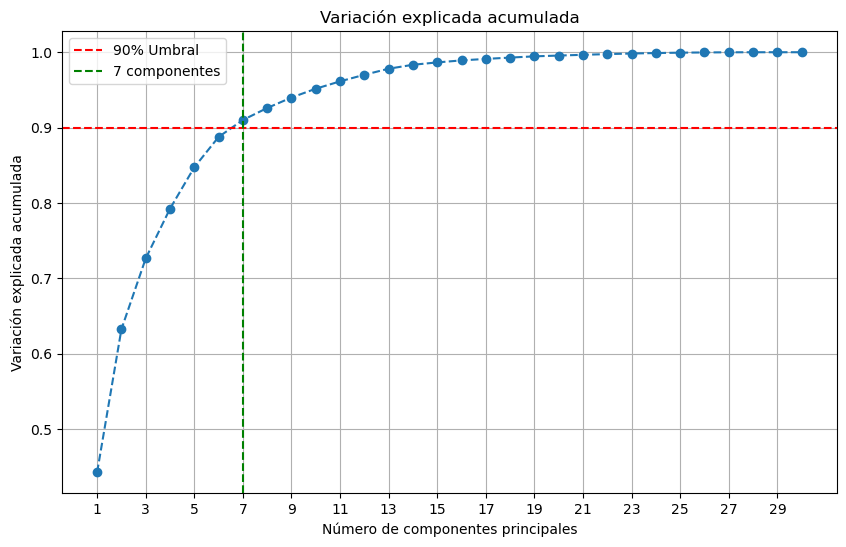

Variación explicada acumulada:
Componente 1: 44.27%
Componente 2: 63.24%
Componente 3: 72.64%
Componente 4: 79.24%
Componente 5: 84.73%
Componente 6: 88.76%
Componente 7: 91.01%
Componente 8: 92.60%
Componente 9: 93.99%
Componente 10: 95.16%
Componente 11: 96.14%
Componente 12: 97.01%
Componente 13: 97.81%
Componente 14: 98.34%
Componente 15: 98.65%
Componente 16: 98.92%
Componente 17: 99.11%
Componente 18: 99.29%
Componente 19: 99.45%
Componente 20: 99.56%
Componente 21: 99.66%
Componente 22: 99.75%
Componente 23: 99.83%
Componente 24: 99.89%
Componente 25: 99.94%
Componente 26: 99.97%
Componente 27: 99.99%
Componente 28: 100.00%
Componente 29: 100.00%
Componente 30: 100.00%


In [6]:

pca_full = PCA(n_components=30)
pca_full.fit_transform(X_scaled)

# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks(range(1, 31, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")

In [7]:
pca = PCA(n_components=7)
pca_2 = pca.fit_transform(X_scaled)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(pca_2, y_enc, test_size=0.2, random_state=42)



3. Implementación de la MLP:
  - Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe tener una capa de entrada que coincida con el número de características del dataset, una capa oculta con al menos 32 neuronas y una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.
  - Utiliza la función de pérdida binaria (binary_crossentropy) y el optimizador Adam.


In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Crear el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(7,)),  # Ajustado a 7 componentes principales
    Dense(64, activation='relu'),
    Dense(y_enc.shape[1], activation='sigmoid')  # Asegurar que la salida tenga la forma correcta
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\diego\miniconda3\envs\deep_learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



4. Entrenamiento del modelo:
  - Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.
  - Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.


In [14]:

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8530 - loss: 0.3848 - val_accuracy: 0.9649 - val_loss: 0.0721
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9826 - loss: 0.0595 - val_accuracy: 0.9649 - val_loss: 0.0680
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9738 - loss: 0.0601 - val_accuracy: 0.9737 - val_loss: 0.0901
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9835 - loss: 0.0465 - val_accuracy: 0.9561 - val_loss: 0.0937
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9924 - loss: 0.0431 - val_accuracy: 0.9737 - val_loss: 0.0860
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9865 - loss: 0.0424 - val_accuracy: 0.9649 - val_loss: 0.0888
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9779 - loss: 0.0460 - val_accuracy: 0.9649 - val_loss: 0.1010
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9946 - loss: 0.0220 - val_accuracy: 0.9649 - val_loss

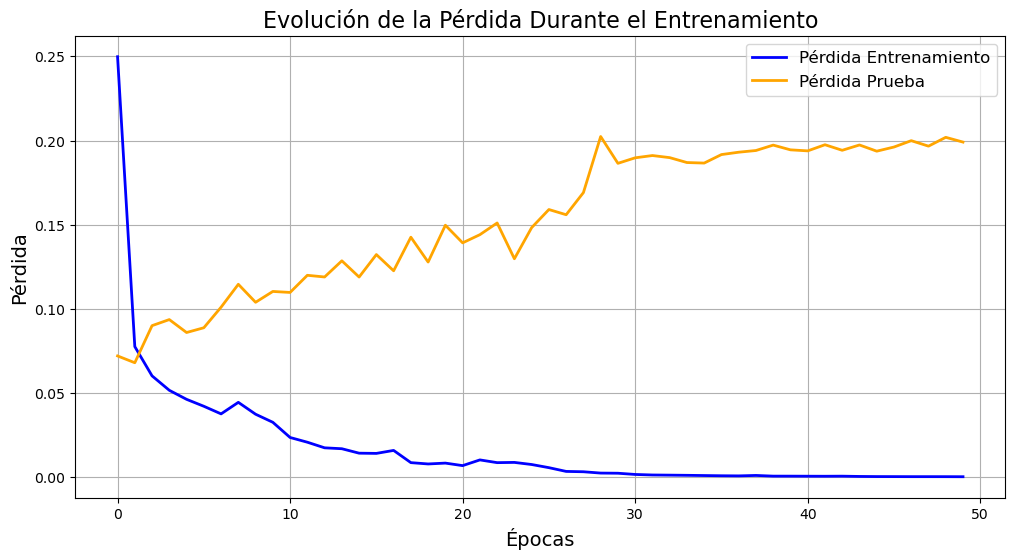

In [15]:
# Graficar pérdida (entrenamiento vs prueba)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Pérdida Prueba', color='orange', linewidth=2)
plt.title("Evolución de la Pérdida Durante el Entrenamiento", fontsize=16)
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Pérdida", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


5. Evaluación del modelo:
  - Evalúa el modelo en el conjunto de prueba utilizando métricas como la precisión, el recall, la F1-score y la matriz de confusión.
  - Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


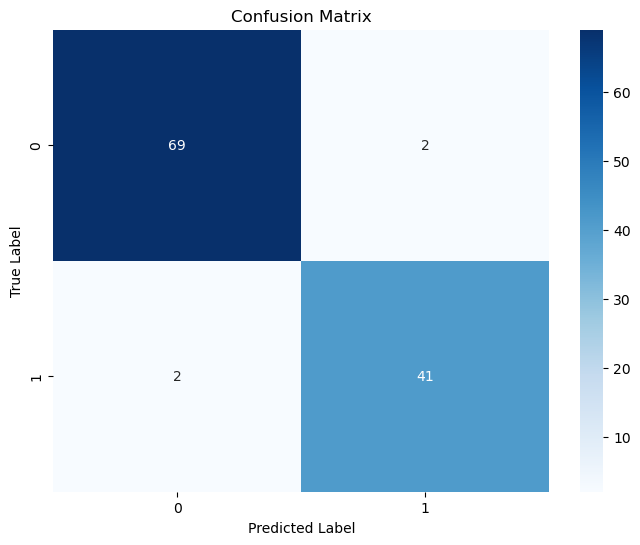

Test Accuracy: 97.37 %
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.98      0.97        43

   micro avg       0.97      0.97      0.97       114
   macro avg       0.96      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
 samples avg       0.97      0.97      0.97       114



In [19]:
y_pred = model.predict(X_test)
# Convert predicted probabilities to binary class labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Plot Matriz de confusión
plt.figure(figsize=(8, 6))

# Compute the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\
Test Accuracy:", round(test_acc * 100, 2), "%")
print("\
Classification Report:")
print(classification_report(y_test, y_pred_binary))
